# Test data for eBoruta
Test data:  
Shape: 20x1000  
y = 0-4 random  
x = 12 linked to y, 6 noises

In [1]:
#  In terminal
#  pip install git+https://github.com/edikedik/eBoruta.git

import numpy as np
import pandas as pd
import math

import logging
import typing as t

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression


from eBoruta import eBoruta, TrialData, Features, Dataset, setup_logger

## Create the data set
x1-x12 are linked to y, x12-x18 are noise

In [3]:
np.random.seed(123) # Set seed for reproducibility, have each time same random data

y = np.random.randint(0, 5, size=1000)
df = pd.DataFrame({'y': y})

In [5]:
np.random.seed(123) # Set seed for reproducibility, have each time same random data

# x1 = 1/2 y^2 + noise
noise = np.random.normal(loc=0, scale=9, size=len(df))
df['x1 = 1/2 y^2 + noise'] = 0.5 * df['y'] ** 2 + np.exp(noise)

# x2 = x1 + noise
df['x2 = e^y + sin⁡(y) -1/3 y^2 + cos⁡(y) -1/2 y^9 + noise'] = np.exp(df['y']) + np.sin(df['y']) - 1/3 * df['y'] ** 2 + np.cos(df['y']) - 1/2 * df['y']** 9 + noise

# x3 = sin(y) + cos(y)
df['x3 = sin(y) + cos(y)'] = np.sin(df['y']) + np.cos(df['y'])

# x4 = e^y + sin(y) + noise
noise2 = np.random.normal(loc=0, scale=4, size=len(df))
df['x4 = e^y + sin(y) + noise'] = np.exp(df['y']) + np.sin(df['y']) + noise2

# x5 = y^4 - y^3 + y^2 - y
df['x5 = y^4 - y^3 + y^2 - y'] = df['y'] ** 4 - df['y'] ** 3 + df['y'] ** 2 - df['y'] 

# x6 = 2*x1 + x4
df[' x6 = 2*x1 + x4'] = 2 * df['x1 = 1/2 y^2 + noise'] + df['x4 = e^y + sin(y) + noise'] 

# x7 = x1 + x3 - x4*noise 
noise3 = np.random.normal(loc=0, scale=10, size=len(df))
df['x7 = x1 + x3 - x4*noise'] = df['x1 = 1/2 y^2 + noise'] + df['x3 = sin(y) + cos(y)'] - df['x4 = e^y + sin(y) + noise']*np.exp(noise3)

# x8 =x5
df['x8 = x5'] = df['x5 = y^4 - y^3 + y^2 - y']

# x9 
noise6 = np.random.normal(loc=0, scale=8, size=len(df))
df['x9 = y*noise + 999y - sqrt y - y^8 + sin(y)'] =  df['y']*noise6 +  (999 * df['y']) -  np.sqrt(df['y']) -  df['y']**8 + np.sin(df['y']) 

# x10 = e^y + sqrt(y)
df['x10 = e^y + sqrt(y) + y^2'] = np.exp(df['y']) + np.sqrt(df['y'] ) + df['y']**2

# x11
noise10 = np.random.normal(loc=0, scale=5, size=len(df))
df['x11 = e^y x sin(y) x noise x + cos(y)'] =  np.sin(df['y']) *  np.exp(df['y']) * noise10 + np.cos(df['y'])

# x12 = noise
noise11 = np.random.normal(loc=0, scale=6, size=len(df))
df['x12 = y^6 - y^3 + y - y*big noise'] = df['y'] ** 6 - df['y'] ** 3 + df['y'] - df['y']*noise11

# x13 = similar to y
# noise4 = np.random.normal(loc=0, scale=0.5, size=len(df))
df['x13 = similar to y'] = np.random.randint(0, 3, size=len(df))


# x14 = random between 0 and 2 (decimal value)
df['x14 = random between 0.0 and 2.0'] = np.random.uniform(0, 3, size=len(df))

# x15 = noise
noise5 = np.random.normal(loc=0, scale=0.1, size=len(df))
df['x15 = sin(x13) + cos(x13)'] = np.sin(df['x13 = similar to y']) + np.cos(df['x13 = similar to y'])

# x16 = random between 3 and 5
df['x16 = random between 3 and 5'] = np.random.randint(3, 6, size=len(df))

# x17 = noise
noise8 = np.random.normal(loc=0, scale=2, size=len(df))
df['x17 = x13 + noise'] = df['x13 = similar to y'] + noise8 

# x18 = x9^2 + x9
# noise9 = np.random.normal(loc=0, scale=0.1, size=len(df))
df['x18 = x13^2 + x13'] = df['x13 = similar to y']**2 + df['x13 = similar to y']





In [6]:
x = df.loc[:, df.columns != 'y']

In [7]:
def plot_imp_history(df_history: pd.DataFrame):
    sns.lineplot(x='Step', y='Importance', hue='Feature', data=df_history)
    sns.lineplot(x='Step', y='Threshold', data=df_history, linestyle='--', linewidth=4)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## Test boruta

In [8]:
boruta = eBoruta(n_iter = 10)
boruta.fit(x, y);

Boruta trials:   0%|          | 0/10 [00:00<?, ?it/s]

In [9]:
features = boruta.features_
features.accepted, features.rejected, features.tentative

(array(['x1 = 1/2 y^2 + noise',
        'x2 = e^y + sin\u2061(y) -1/3 y^2 + cos\u2061(y) -1/2 y^9 + noise',
        'x3 = sin(y) + cos(y)', 'x4 = e^y + sin(y) + noise',
        'x5 = y^4 - y^3 + y^2 - y', ' x6 = 2*x1 + x4', 'x8 = x5',
        'x9 = y*noise + 999y - sqrt y - y^8 + sin(y)',
        'x10 = e^y + sqrt(y) + y^2',
        'x11 = e^y x sin(y) x noise x + cos(y)',
        'x12 = y^6 - y^3 + y - y*big noise'], dtype=object),
 array(['x13 = similar to y', 'x14 = random between 0.0 and 2.0',
        'x15 = sin(x13) + cos(x13)', 'x16 = random between 3 and 5',
        'x17 = x13 + noise', 'x18 = x13^2 + x13'], dtype=object),
 array(['x7 = x1 + x3 - x4*noise'], dtype=object))

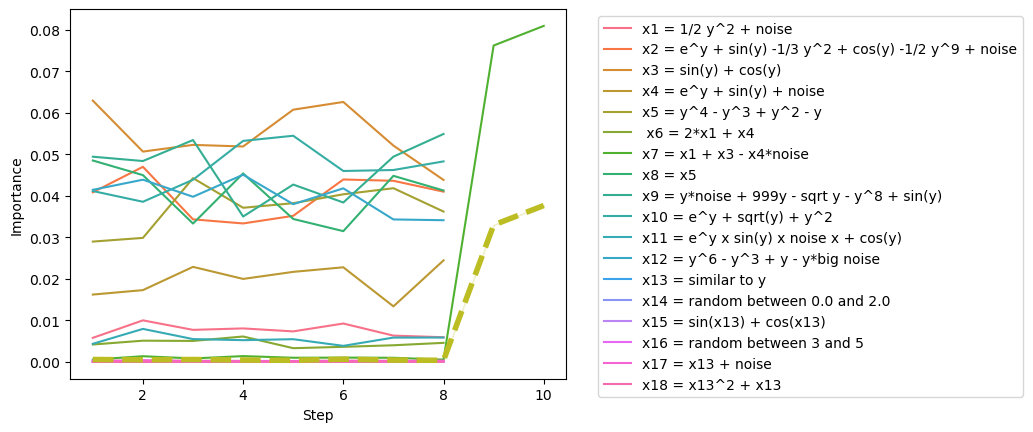

In [10]:
df = features.history
plot_imp_history(df)

In [11]:
r=boruta.rank(gen_sample = True, sort = True)
print(r)

                                              Feature  Importance
2                                x3 = sin(y) + cos(y)    0.054474
8         x9 = y*noise + 999y - sqrt y - y^8 + sin(y)    0.052258
9                           x10 = e^y + sqrt(y) + y^2    0.045721
4                            x5 = y^4 - y^3 + y^2 - y    0.042264
7                                             x8 = x5    0.040797
11                  x12 = y^6 - y^3 + y - y*big noise    0.037498
1   x2 = e^y + sin⁡(y) -1/3 y^2 + cos⁡(y) -1/2 y^9...    0.037376
3                           x4 = e^y + sin(y) + noise    0.017190
0                                x1 = 1/2 y^2 + noise    0.008849
5                                      x6 = 2*x1 + x4    0.005837
10              x11 = e^y x sin(y) x noise x + cos(y)    0.005820
6                             x7 = x1 + x3 - x4*noise    0.001294
34                           shadow_x17 = x13 + noise    0.000386
31            shadow_x14 = random between 0.0 and 2.0    0.000318
23        

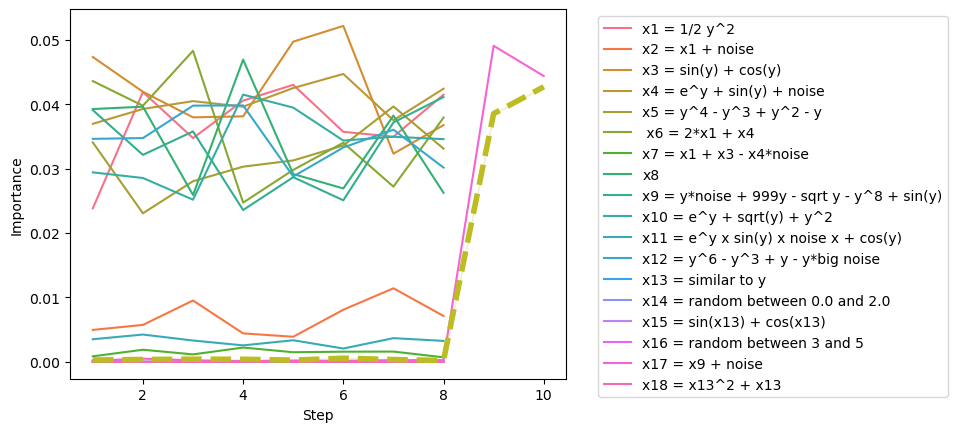

In [11]:
plot_imp_history(df)

## Change parameters: p-value, and percentile

- p-value 

Parameter that controls the statistical significance of the feature importance

The p-value is the threshold that determines whether a feature is considered important or not.  
A feature is considered important if its importance score is significantly higher than the importance score of the random shadow features with a p-value of 0.05. (by default)

Increase the p-value, fewer features will be considered important, as the threshold for statistical significance will be higher.  
Decrease the p-value, more features will be considered important, as the threshold for statistical significance will be lower.



- percentile

Parameter that controls the threshold for the feature importance

The percentile is used to calculate a threshold for the feature importance scores.  
If the percentile is set to 90%, the threshold will be set to the 90th percentile of the feature importance scores. Any feature with an importance score above the threshold is considered important.

Increase the percentile, the threshold for feature importance will be higher, so fewer features will be considered important.  
Decrease the percentile, the threshold will be lower, so more features will be considered important.


Boruta trials:   0%|          | 0/20 [00:00<?, ?it/s]

['x1 = 1/2 y^2 + noise'
 'x2 = e^y + sin\u2061(y) -1/3 y^2 + cos\u2061(y) -1/2 y^9 + noise'
 'x3 = sin(y) + cos(y)' 'x4 = e^y + sin(y) + noise'
 'x5 = y^4 - y^3 + y^2 - y' ' x6 = 2*x1 + x4' 'x7 = x1 + x3 - x4*noise'
 'x8 = x5' 'x9 = y*noise + 999y - sqrt y - y^8 + sin(y)'
 'x10 = e^y + sqrt(y) + y^2' 'x11 = e^y x sin(y) x noise x + cos(y)'
 'x12 = y^6 - y^3 + y - y*big noise'] ['x13 = similar to y' 'x14 = random between 0.0 and 2.0'
 'x15 = sin(x13) + cos(x13)' 'x16 = random between 3 and 5'
 'x17 = x13 + noise' 'x18 = x13^2 + x13'] []


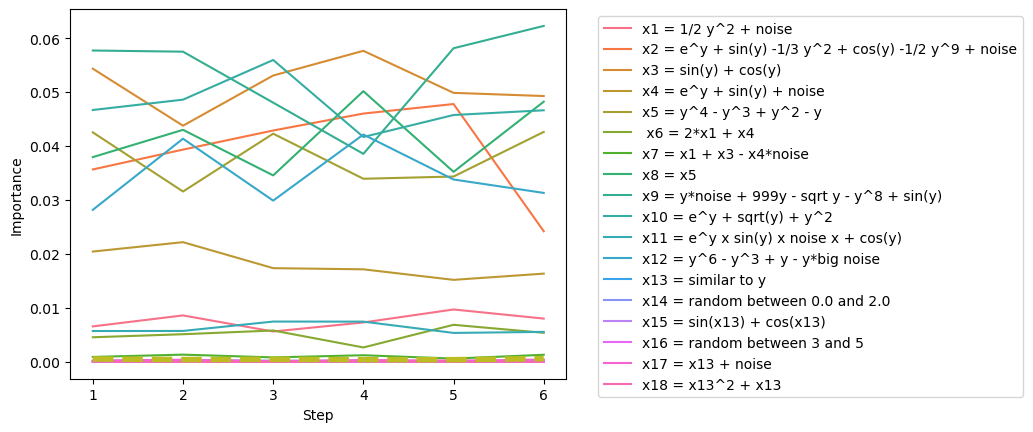

                                              Feature  Importance
1   x2 = e^y + sin⁡(y) -1/3 y^2 + cos⁡(y) -1/2 y^9...    0.060904
2                                x3 = sin(y) + cos(y)    0.057690
8         x9 = y*noise + 999y - sqrt y - y^8 + sin(y)    0.047870
9                           x10 = e^y + sqrt(y) + y^2    0.047198
4                            x5 = y^4 - y^3 + y^2 - y    0.036771
11                  x12 = y^6 - y^3 + y - y*big noise    0.033748
7                                             x8 = x5    0.030271
3                           x4 = e^y + sin(y) + noise    0.017601
5                                      x6 = 2*x1 + x4    0.005965
10              x11 = e^y x sin(y) x noise x + cos(y)    0.005107
0                                x1 = 1/2 y^2 + noise    0.004947
6                             x7 = x1 + x3 - x4*noise    0.001072
26  shadow_x9 = y*noise + 999y - sqrt y - y^8 + si...    0.000423
18                        shadow_x1 = 1/2 y^2 + noise    0.000357
28       s

In [12]:
boruta = eBoruta(n_iter = 20, pvalue = 0.1, percentile = 100) 
boruta.fit(x, y);
features = boruta.features_
print(features.accepted, features.rejected, features.tentative)
df = features.history
plot_imp_history(df)
r=boruta.rank(sort = True, gen_sample = True)
print(r)
dictionary = dict(zip(r['Feature'], r['Importance'].apply(lambda x: [x])))
print(dictionary)

Boruta trials:   0%|          | 0/40 [00:00<?, ?it/s]

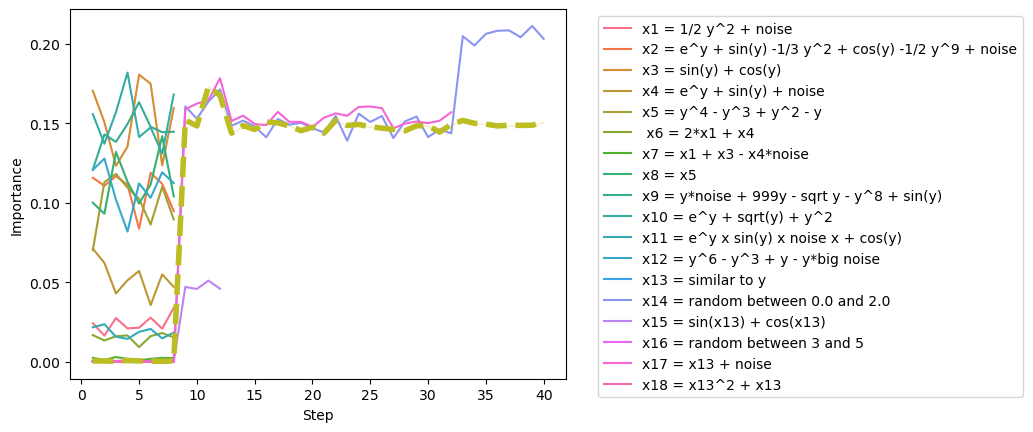

In [14]:
boruta = eBoruta(n_iter = 40, pvalue = 0.05, test_size = 0.3, percentile = 70, shap_tree = False ).fit(x, y)
plot_imp_history(boruta.features_.history)

In [15]:
features = boruta.features_
features.accepted, features.rejected, features.tentative

(array(['x1 = 1/2 y^2 + noise',
        'x2 = e^y + sin\u2061(y) -1/3 y^2 + cos\u2061(y) -1/2 y^9 + noise',
        'x3 = sin(y) + cos(y)', 'x4 = e^y + sin(y) + noise',
        'x5 = y^4 - y^3 + y^2 - y', ' x6 = 2*x1 + x4',
        'x7 = x1 + x3 - x4*noise', 'x8 = x5',
        'x9 = y*noise + 999y - sqrt y - y^8 + sin(y)',
        'x10 = e^y + sqrt(y) + y^2',
        'x11 = e^y x sin(y) x noise x + cos(y)',
        'x12 = y^6 - y^3 + y - y*big noise', 'x17 = x13 + noise'],
       dtype=object),
 array(['x13 = similar to y', 'x15 = sin(x13) + cos(x13)',
        'x16 = random between 3 and 5', 'x18 = x13^2 + x13'], dtype=object),
 array(['x14 = random between 0.0 and 2.0'], dtype=object))